# Apprentissage par Régression Linéaire Multiple (RLM) avec Python

Un agent immobilier souhaite obtenir de l'aide pour prévoir les prix des maisons dans les régions des États-Unis. Ce serait formidable si vous pouviez en quelque sorte créer un modèle qui peut lui permettre d'intégrer quelques caractéristiques d'une maison et de renvoyer une estimation du prix de la maison.
L’agent immobilier vous a demandé si vous pouviez l'aider avec vos nouvelles compétences en science des données. Vous dites oui et décidez que la régression linéaire pourrait être un bon moyen de résoudre ce problème !
Pour cela, l’argent immobilier vous donne des informations sur un échantillon de 5000 maisons dans des régions des États-Unis. Ces informations se trouvent da la table de données : "Maisons.csv".

Cette table de données contient les caractéristiques suivantes :
*	'Revenu_moyen' : Le revenu moyen des résidents de la ville où se trouve la maison.
*	'Age_moyen': L’âge moyen des maisons de la ville où se trouve la maison.
*	'Nb_moyen_pieces': Nombre moyen de pièces dans les maisons de la ville où se trouve la maison.
*	'Nb_moyen_chambres' : Nombre moyen de chambres à coucher dans les maisons de la ville où se trouve la maison.
*	'Population' : La population de la ville où se trouve la maison.
*	'Prix' : Le prix avec lequel la maison s’est vendue
*	'Adresse' : Adresse de la maison.

Objectif : Appliquer la technique d'apprentissage supervisé par régression linéaire pour prédire le prix d'une nouvelle maison dont on dispose de ces caractériques.

## Importation des librairies
Pour pouvoir mettre en oeuvre l'apprentissage par régression linéaire, nous commencons par l'importation des librairies Python dont on aura besoin.
* pandas : c'est la librairie de référence pour la manipulation des tables de données.
* numpy  : destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
* matplotlib.pyplot : Matplotlib est une librairie destinée à tracer et visualiser des données sous formes de graphiques.
* seaborn : est une librairie de Data Visualization qui vient s'ajouter à Matplotlib en remplacant certains réglages par défaut et fonctions tout en lui ajoutant de nouvelles fonctionnalités.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Analyse Statistique des données

In [167]:
# Importation de la table de données
Maisons = pd.read_csv('Maisons.csv')

In [168]:
# Affichage des cinq premières lignes de la table de données.
Maisons.head()

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population,Prix,Adresse
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### 1.1 Informations relatives aux données de la table


In [169]:
Maisons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Revenu_moyen       5000 non-null   float64
 1   Age_moyen          5000 non-null   float64
 2   Nb_moyen_pieces    5000 non-null   float64
 3   Nb_moyen_chambres  5000 non-null   float64
 4   Population         5000 non-null   float64
 5   Prix               5000 non-null   float64
 6   Adresse            5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Les types des variables sont bonnes donc pas de problèmes liés à l'importation des données.

### 1.2 Statistiques descriptives des variables de la table de données

In [171]:
Maisons.describe()

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population,Prix
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### Deux remarques sont à tenir à ce niveau:
*  Il n'y a pas de données manquantes visiblement;
*  L'écart entre les variables est énorme et celui permet de les répartir en deux groupes:
      -  Les variables (Revenu_moyen, Population) ont une échelle similaire
      - Tandis que les variables (Age_moyen, Nb_moyen_pieces, Nb_moyen_chambres) vont de paires.

In [173]:
Maisons.isnull().sum()

Revenu_moyen         0
Age_moyen            0
Nb_moyen_pieces      0
Nb_moyen_chambres    0
Population           0
Prix                 0
Adresse              0
dtype: int64

En vérifiant l'hypothèse de l'absence de données manquantes, on peut voir que les __données sont complètes__. Pas de valeurs manquantes.

La variable **Adresse** servant d'indication, on peut la supprimer des données

In [174]:
Maisons = Maisons[['Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces', 'Nb_moyen_chambres','Population', 'Prix']]
Maisons

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population,Prix
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


### 1.3 Etude des rélations entre les variables de la table  

<Axes: >

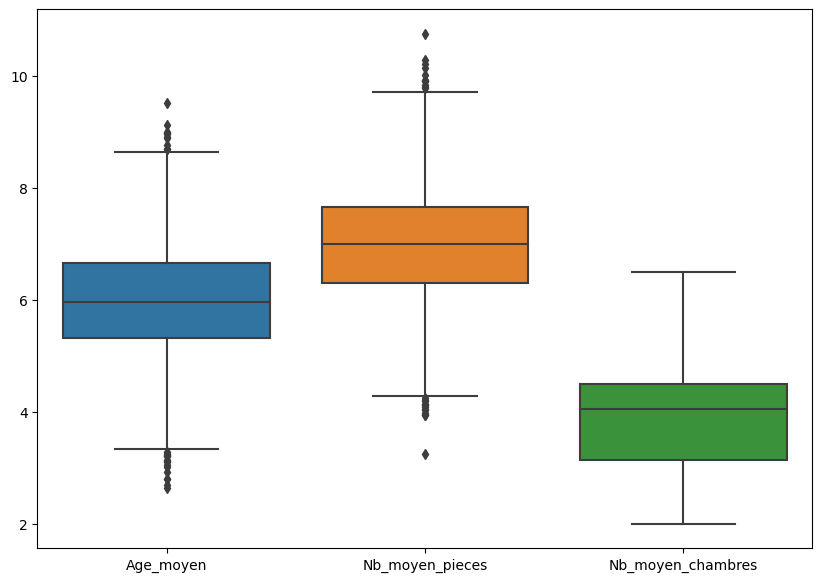

In [175]:
# Boxplot des variables
plt.figure(figsize = (10, 7))
sns.boxplot(Maisons[['Age_moyen', 'Nb_moyen_pieces', 'Nb_moyen_chambres']])


<Axes: >

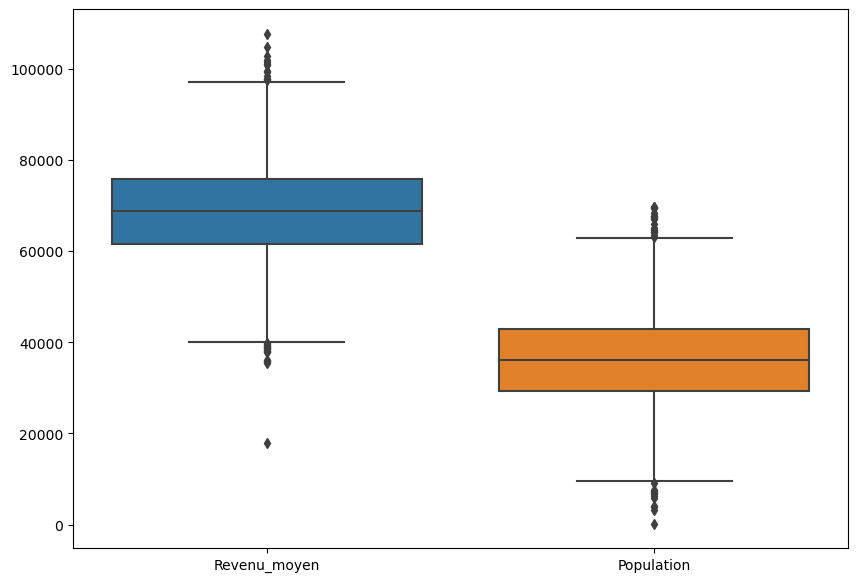

In [176]:
# Boxplot des variables
plt.figure(figsize = (10, 7))
sns.boxplot(Maisons[['Revenu_moyen','Population']])



*   A part la variable **Nombre moyen de chambres**, il ya une forte présence d'outliers dans les autres variables.

*   Pour le moment, nous allons continuer sans suppression de ces valeurs aberantes.



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x500 with 0 Axes>

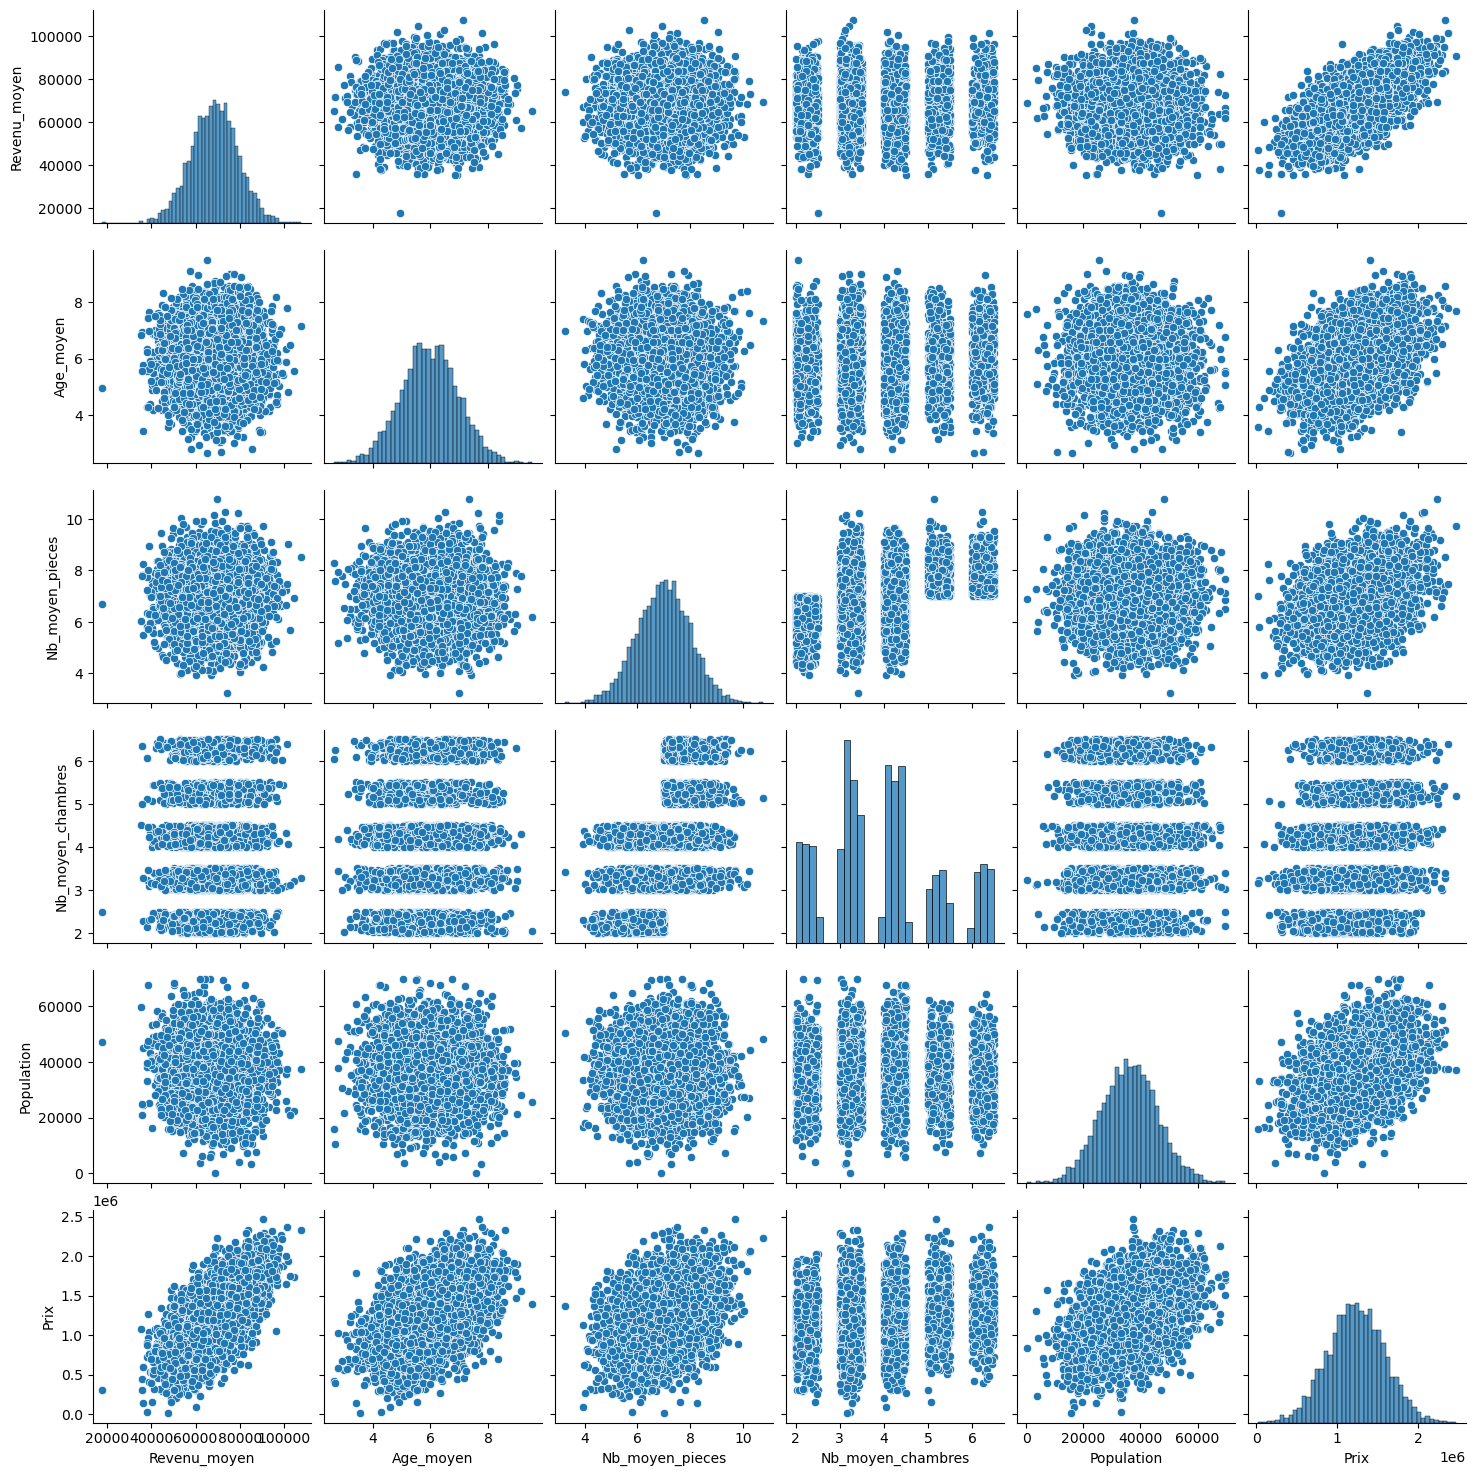

In [177]:
# Graphiques des distributions observées des variables et ceux des nuages de points

plt.figure(figsize = (5, 5))
sns.pairplot(Maisons)

#### Ce qu'il faut retenir de ce graphique de sns.pairplot

1.   Toutes les distributios des variables indépendantes semblent être **normales** sauf celle de la variable **nombre moyen de chambres**.
2.   Les variables *revenu moyen, age moyen, nombre de pieces, population* ont plutôt une relation linéaire avec la variable **prix**. Cette  relation linéaire semble être forte pour la variable **revenu moyen** que pour les autres.
3.  Il n y a pas de rélation linéaire entre les variables indépendantes.

Dans la suite, nous allons voir la ***corrélation*** pour ensuite confirmer ces remarques par des ***tests statistiques***.





### 1.3 Corélation entre les variables

<Axes: >

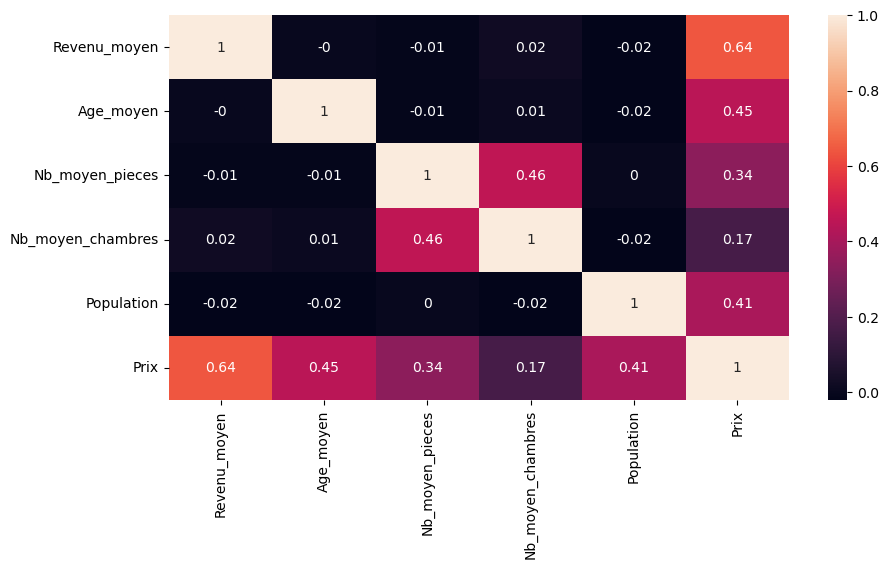

In [181]:
# Calcul des coefficients de correlation

corr_Maisons = Maisons.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(round(corr_Maisons, 2), annot = True)

#### Remarques à retenir:

*   La corrélation est forte entre la variable **revenu moyen** et la variable cible **prix**, soit $0.64$, ceci se traduit par la _possibilité dune forte rélation linéraire_ entre ces variables.
*   La corrélation est plutot moyenne entre les variables age moyen, population et la cible, soit $0.45$ et $0.41$ respectivement. Cela signifie que s'il existe une rélation linéaire entre ces variables, celle-ci est moins importante.
*  La corrélation est très faible pour le reste des variables.


Pour confirmer ces hypothèses, nous allons effectuer des tests de Pearson ou Spearman ou Kendall


### 1.4 Test de Normalité des variables

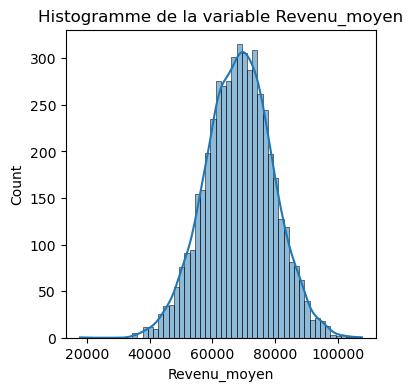

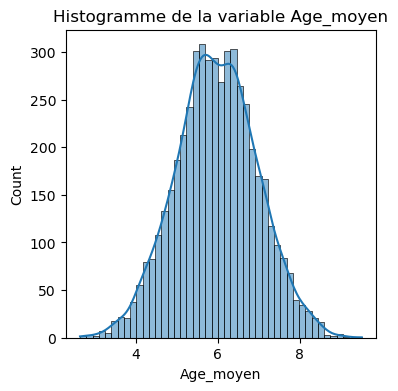

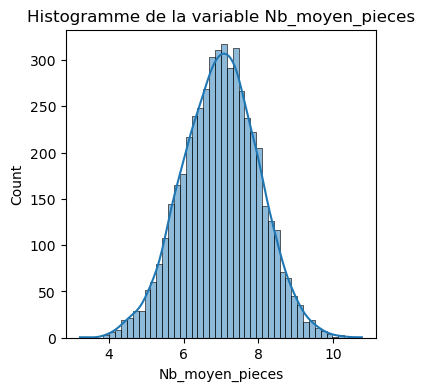

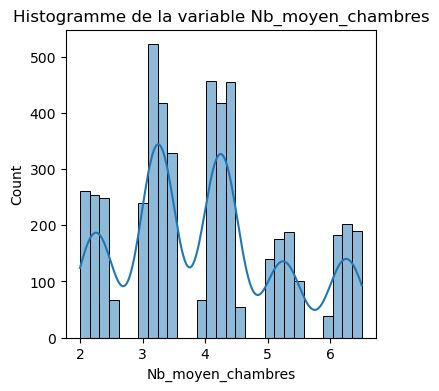

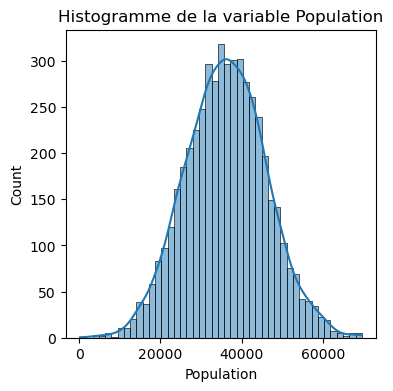

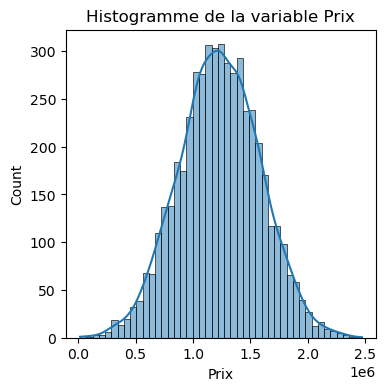

In [182]:
# Analyse de la normalité
from scipy.stats import shapiro

# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in Maisons.columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(data=Maisons, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()



In [183]:
# Initialisation du DataFrame pour les résultats des tests de normalité
normality_df = pd.DataFrame(columns=['Variable', 'P-value', 'Normality'])

# Boucle pour calculer les tests de normalité pour chaque variable
for var in Maisons.columns:
    stat, p = shapiro(Maisons[var])
    normality = 'Normal' if p > 0.05 else 'Not Normal'
    normality_df = normality_df._append({'Variable': var, 'P-value': p, 'Normality': normality}, ignore_index=True)

# Affichage du DataFrame des résultats des tests de normalité
print(normality_df)

            Variable       P-value   Normality
0       Revenu_moyen  4.595608e-01      Normal
1          Age_moyen  6.726206e-01      Normal
2    Nb_moyen_pieces  5.064501e-01      Normal
3  Nb_moyen_chambres  8.345328e-39  Not Normal
4         Population  3.008120e-01      Normal
5               Prix  9.542976e-01      Normal


Le **test de Shapiro** confirme bien la normalité des variables **sauf** pour la variable _Nb_moyen_chambres_.

### 1.6 Test de corrélation de Pearson

#### Hypothèses :
- H0(hypothèse nulle) : Il n'y a pas de corrélation **linéaire** entre les deux variables.
- H1(hypothèse alternative) : Il y a une corrélation **linéaire** entre les deux variables.

#### Conditions d'utilisation :
- Les deux variables sont quantitatives et mesurées sur une échelle continue.
- La relation entre les deux variables est linéaire
- Les deux variables suivent une **distribution normale**.


#### Interprétation :
Le coefficient de corrélation de pearson varie entre -1 et 1.

- Si le coefficient est proche de 1 par exemple (0.6), il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1 (par exemple -0.6), il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de corrélation linéaire entre les variables.


Vous pouvez aussi regarder la pvaleur du test:

- Si p < 0.05, on rejette H0 et on conclut qu'il y a une corrélation significative entre les deux variables.
- Si p >= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation significative entre les deux variables.


In [184]:
from scipy.stats import pearsonr, spearmanr

for var in Maisons.columns[:-1]:
    print(f'Pearson entre la variable {var} et la variable cible Prix: {pearsonr(Maisons[var], Maisons.Prix)}')
    print('\n')


Pearson entre la variable Revenu_moyen et la variable cible Prix: PearsonRResult(statistic=0.639733778249894, pvalue=0.0)


Pearson entre la variable Age_moyen et la variable cible Prix: PearsonRResult(statistic=0.4525425371787557, pvalue=4.944750033728642e-251)


Pearson entre la variable Nb_moyen_pieces et la variable cible Prix: PearsonRResult(statistic=0.33566445336675965, pvalue=6.16589255563637e-132)


Pearson entre la variable Nb_moyen_chambres et la variable cible Prix: PearsonRResult(statistic=0.17107102765855592, pvalue=3.8088849851963346e-34)


Pearson entre la variable Population et la variable cible Prix: PearsonRResult(statistic=0.40855587931655635, pvalue=1.7363920538051746e-200)




Au regard de la noramlité de la distribuion des variables **revenu moyen, age moyen, nb_moyen_pieces, population**, *le test de Pearson est acceptable* donc il existe une rélation linéaire entre ces variables et la variable cible **Prix**. Puisque la normalité n'est pas vérifiée pour la variable _Nb\_moyen\_chambres_, nous allons procéder par test de **Spearman**.

#### Test de Spearman pour la variable *Nb_moyen_chambre* dont la distribution n'est pas **normale**.

In [185]:
spearmanr(Maisons.Nb_moyen_chambres, Maisons.Prix)

SignificanceResult(statistic=0.1581727049551064, pvalue=2.248497348324004e-29)

La p-value = $2.25e^{-29}$ très inférieur au seul $5\%$ alors il existe une **rélation monotone** entre le nombre moyen de chambres (_Nb_moyen_chambre_) et le _Prix_.

## 2. Mise en oeuvre de la régression linéaire (RL) avec statsmodels


Maintenant, nous allons séparer les données en données d'entrainement et de test en utilisant la fonction train_test_split Sklearn.preprocessing

In [272]:
X = Maisons[['Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces', 'Nb_moyen_chambres','Population']]
Y = Maisons['Prix']

In [273]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [274]:
X_train.head()

,Revenu_moyen,Age_moyen,Nb_moyen_pieces,Nb_moyen_chambres,Population
3413,69048.788093,6.619712,6.123813,4.33,36817.368760
1610,67866.899929,5.393978,9.359022,5.44,43122.574176
3459,56636.238191,5.497667,7.121872,6.10,47541.431763
4293,79310.361977,4.247434,7.518204,4.38,43982.188957
1039,72821.247664,6.480819,7.116655,5.33,40594.059297


### 2.1. Normalisation des données

Nous effecuons une normalisation des données car l'écart entre les variables est énorme. Vu que la plupart d'entre elles suivent une distribution normale, nous allons choisir la méthode **StandardScaler** qui permet de les centrer autour de la moyenne et les réduire.

In [193]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = scaler.transform(X_test)
# X_test = pd.DataFrame(X_test, columns = X.columns)

X_train

array([[ 0.05569623,  0.65886183, -0.86300913,  0.29911519,  0.06391981],
       [-0.05545523, -0.58559522,  2.37598858,  1.2000951 ,  0.69883088],
       [-1.11165023, -0.48032202,  0.13621855,  1.73581289,  1.14379364],
       ...,
       [-1.20704442, -2.26895761, -0.11765963, -1.34862286,  2.71900465],
       [-0.50898477, -0.03604344, -1.07361484,  0.11242565, -0.34813857],
       [ 0.62279188,  1.69958661,  1.456617  ,  0.29911519,  2.01048875]])

In [275]:
#importation du package permettant de réaliser un modèle de régression linéaire
import statsmodels.api as sm

#Déclaration du modèle
ols1 = sm.OLS(Y_train, sm.add_constant(X_train))

#lancement des calculs
RL_model1 = ols1.fit()

# Affichage des résultats
print(RL_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     8842.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        05:21:26   Log-Likelihood:                -51777.
No. Observations:                4000   AIC:                         1.036e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -2.64e+06   1.93e+0

##### Remarques:

-  Le modèle est significatif de façon générale avec une p-value = $0$.

-  Toutes les vaiables sont significatives sauf la variable **x4** qui correspond à la variable **Nb_moyen_chambres** initialement. On a vu précédemment que la rélation entre la variable **Nb_moyen_chambres** et la cible **prix** n'était pas forte et pas forcément linéaire aussi.

-  Le coefficient de détermination du modèle est **R** $= 0.917$ ce qui signifie que notre modèle permet d'expliquer $91.7\%$ de l'information de nos vaiables.

###### Enlevons cette variable **Nb_moyen_chambres** du modèle et voyons s'il a un impact sur le modèle.

In [276]:
#importation du package permettant de réaliser un modèle de régression linéaire
import statsmodels.api as sm

# Suppression de la variable 'Nb_moyen_chambres'
X_train = X_train[:, np.arange(X_train.shape[1]) != 3]

#déclaration du modèle
ols2 = sm.OLS(Y_train, sm.add_constant(X_train))

#lancement des calculs
RL_model2 = ols2.fit()

# Affichage des résultats
print(RL_model2.summary())

InvalidIndexError: (slice(None, None, None), array([ True,  True,  True, False,  True]))

##### Remarques:
Vraissemblement, cette vaiable n'apporte pas d'information. Son impact sur le modèle est donc négligeable.

## Etape 3: Vérification des hypothèses de la régression linéaire


*  La linéarité des variables indépendantes avec la variable cible
*  Absence d'Auto-corrélation ou Indépendance des erreurs
*  Homoscédasticité des erreurs
*  Absence de multicolinéarité des variables explicatives
* Nullité des espérences des erreurs
* Normalité des résidus

### 3.1 Linéarité des variables explicatives

On a vu la sous-section 1.5 et 1.6 que toutes les variables ont une rélation plutot linéaires avec la variable cible sauf le Nb_moyen_chambres.

## 3.2 Nullité des erreurs

In [197]:
np.mean(RL_model2.resid)

-1.8917489796876907e-10

###### Cs: La moyenne des erreurs est nulle.

## 3.3 Auto-corrélation des résidus

<Figure size 300x300 with 0 Axes>

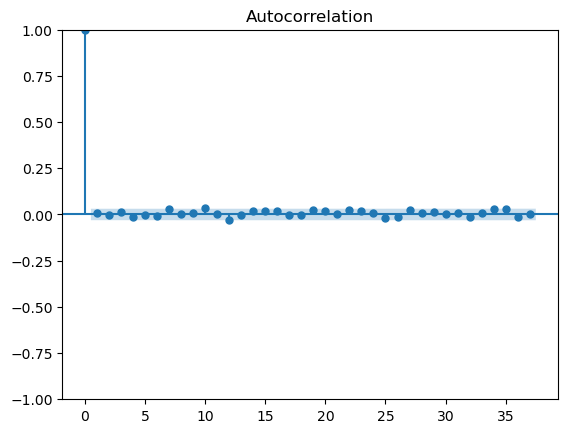

In [202]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (3, 3))
plot_acf(RL_model2.resid)
plt.show()

In [203]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
print(durbin_watson(RL_model2.resid))

1.9809644621296907


###### Remarques:
-  Le **test de Durbin Watson** donne une statistique de $1.98$ qui se situe entre $1.5$ et $2.5$ alors les résidus ne sont pas auto-corrélés.

## 3.4 Homocédasticité des résidus - test de Breush Pagan

In [206]:
import statsmodels
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(RL_model2.resid, RL_model2.model.exog)
print('p value test Breusch Pagan:', round(pval, 2))

p value test Breusch Pagan: 0.06


-  La p-value du test de **Breush Pagan** est de $0.06$ qui est supérieur au seul de $5\%$ donc _la variance des résidus est constante_.

## 3.5 Absence de multi-colinéarité des variables explicatives

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = RL_model2.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]


[1.0004644708125876, 1.0007785037147494, 1.0005430607162, 1.0007976683942046]

###### Remarques:

-  Le Vif ou le facteur d'inflation de la variance est environ égal à $1$ pour chaque varible et qui est inférieur à $5$ alors il n'y a pas de multicolinéarité entre les variables. 


## 3.6 Normalité des résidus

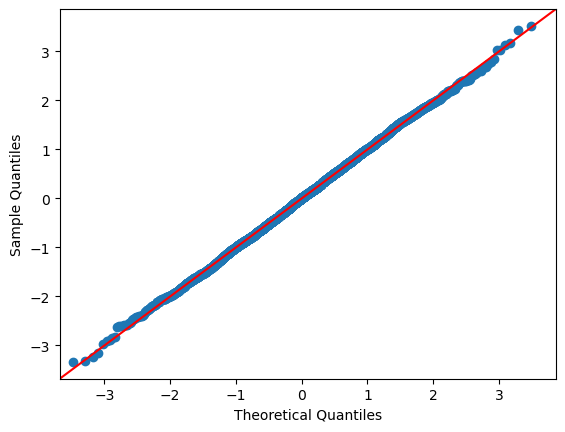

In [216]:
sm.qqplot(RL_model2.resid, fit=True, line="45")
plt.show()

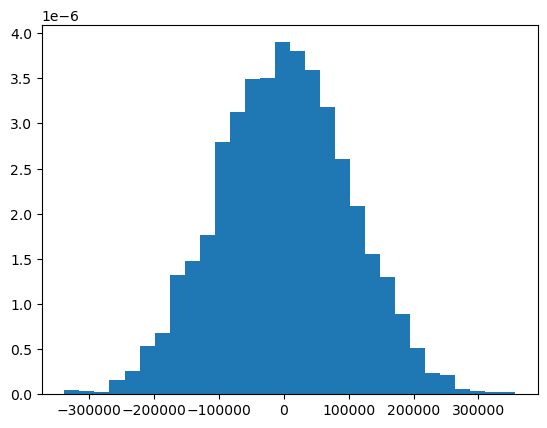

In [249]:
plt.hist(RL_model2.resid, bins = 30, density=True)
plt.show()

In [220]:
shapiro(RL_model2.resid)

ShapiroResult(statistic=0.9994741082191467, pvalue=0.34352707862854004)

###### Remarques:

-  Graphiquement:
    - Le qqplot et 
    - l'histogramme des résidus supposent la normalité des ceux-ci.
- Le test de Shapiro confirme cette hypothèse de normalité avec une p-value de $0.34$.

## 5. Vérification de la présence de points influents avec la distance de Cook

### 5.1 Points de Levier

In [221]:
from scipy.stats import t, shapiro


alpha=0.05
n = X_train.shape[0]     
p = 4

In [222]:
import numpy as np

points_influents = pd.DataFrame({'Observations':np.arange(1, n+1)})


points_influents['Levier']=RL_model2.get_influence().hat_matrix_diag
seuil_levier=(2*p)/n

points_influents[points_influents['Levier']>seuil_levier].shape

# points_influents.head()

(546, 2)

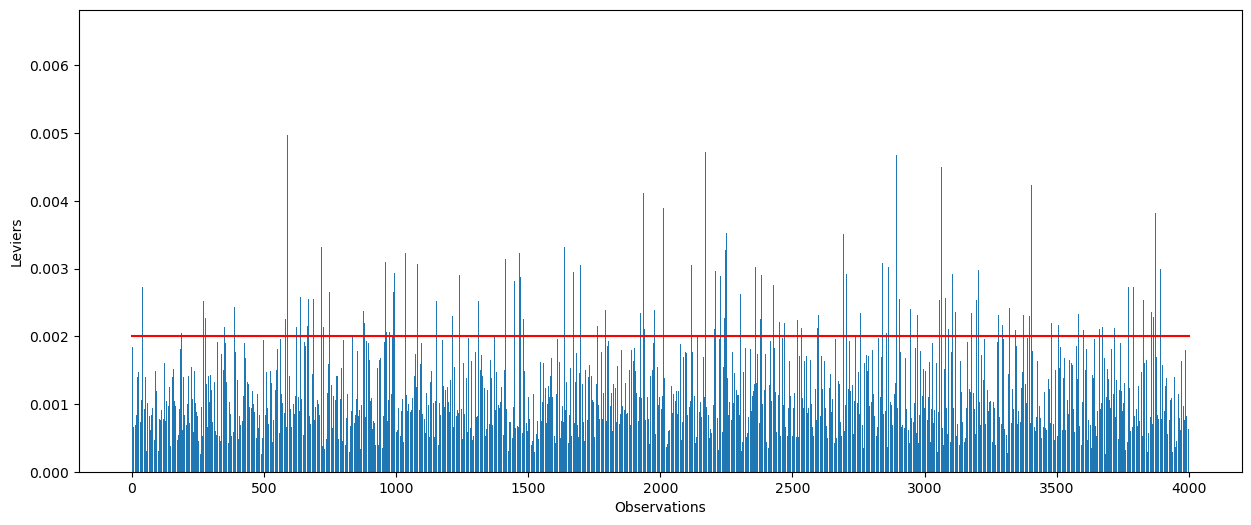

In [223]:
plt.figure(figsize=(15,6))

plt.bar(points_influents['Observations'], points_influents['Levier'])
plt.xlabel('Observations')
plt.ylabel('Leviers')
plt.plot([0, n], [seuil_levier, seuil_levier], color='r')
plt.show()

### 5.2 Ditance de Cook

In [230]:
points_influents['cook_distance'] = RL_model2.get_influence().cooks_distance[0]
seuil_cook_distance = 4/(n-p)


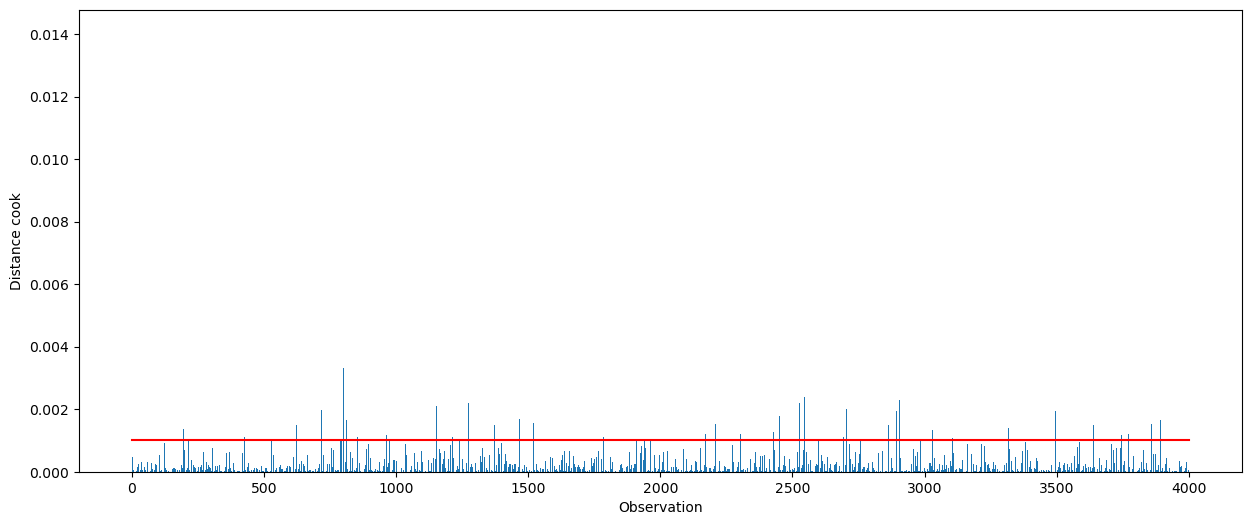

In [232]:
plt.figure(figsize=(15,6))

plt.bar(points_influents['Observations'], points_influents['cook_distance'])
plt.xlabel('Observation')
plt.ylabel('Distance cook')
plt.plot([0, n], [seuil_cook_distance, seuil_cook_distance], color='r')
plt.show()

###### Remarques:

- Il ya la présence de points de levier forts
- De même l'évaluation de la distance de Cook permet de voir l'influence de ces points sur le modèle

###### Hypothèse: 
Nous allons enlever ces points et réentrainer le modèle pour voir leur impac sur le modèle.

In [233]:
# Identifier les indices des observations à supprimer (avec des distances de Cook supérieures au seuil)
indices_a_supprimer = np.where(RL_model2.get_influence().cooks_distance[0] > seuil_cook_distance)[0]

# Supprimer les observations influentes du jeu de données
X_sans_influence = np.delete(X_train, indices_a_supprimer, axis=0)
y_sans_influence = np.delete(Y_train, indices_a_supprimer)

# Réajuster le modèle sans les observations influentes
model_sans_influence = sm.OLS(y_sans_influence, sm.add_constant(X_sans_influence))
RL_sans_influence = model_sans_influence.fit()

# Afficher les nouveaux résultats du modèle ajusté
print(RL_sans_influence.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.207e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:56:52   Log-Likelihood:                -48731.
No. Observations:                3793   AIC:                         9.747e+04
Df Residuals:                    3788   BIC:                         9.750e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.228e+06   1493.644    822.320      0.0

In [234]:
print(RL_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prix   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:57:00   Log-Likelihood:                -51778.
No. Observations:                4000   AIC:                         1.036e+05
Df Residuals:                    3995   BIC:                         1.036e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.229e+06   1602.340    766.751      0.0

###### Remarques:

On peut remarquer sur le summary du nouveau modèle (**RL_sans_influence**) qu'il n'y a pas de différence significative entre les résultats de cekui-ci et le modèle **RL_model2** construit précédemment.

### Critères d'évaluation pour le modèle de régression


Il existe trois critères d'évaluation pour les problèmes de régression:

**Mean Absolute Error** (MAE) c'est la moyenne de la valeur absolue des erreurs :

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) c'est la moyenne des erreurs au carré :

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) c'est la racine carré de la moyenne des erreurs au carré :

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparaison de ces trois critères :

- **MAE** est le plus simple à comprendre, car c'est l'erreur moyenne.
- **MSE** est plus populaire que MAE car MSE est plus impacté par les erreurs les plus élevés, ce qui a tendance à être utile en pratique.
- **RMSE** est encore plus populaire que MSE, car RMSE est interprétable en le comparant aux valeurs "Y" car il sont de même unités.

Tous ces critères sont des **fonctiond de perte** qu'on cherche à minimiser.

In [235]:
from sklearn import metrics

In [236]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 81251.34759063808
MSE: 10096507277.464693
RMSE: 100481.37776456239


Text(0.5, 1.0, 'Scatter plot des observations estimées et réelles')

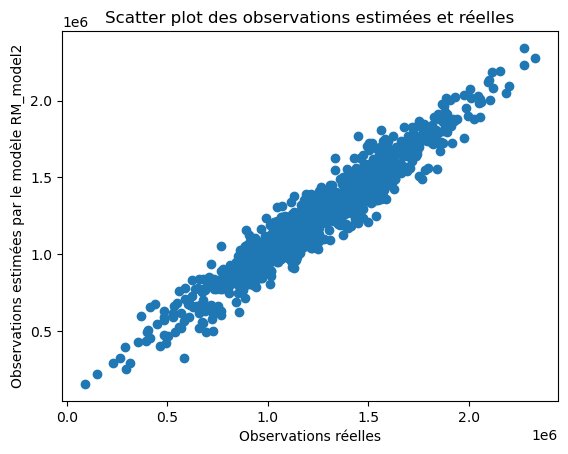

In [240]:
# Fonction de prediction utilisant les paramètres du modèle RL_model2

def predict(model_params, pred_data):
    return model_params[0] + np.dot(pred_data, model_params[1:])


predictions = predict(RL_model2.params,  X_test[:, np.arange(X_test.shape[1]) != 3])


# prediction = RL_model2.predict(X_test.drop('Nb_moyen_chambres', axis = 1))
plt.scatter(Y_test, predictions)
plt.xlabel('Observations réelles')
plt.ylabel('Observations estimées par le modèle RM_model2')
plt.title('Scatter plot des observations estimées et réelles')

#### Pour faire une nouvelle prédiction en utilisant le modèle RL_model2

In [277]:

def Nouvelle_prediction(pred_data, rl_params):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    
    X = Maisons[['Revenu_moyen', 'Age_moyen', 'Nb_moyen_pieces','Population']]
    Y = Maisons['Prix']
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    pred_data = scaler.transform(pred_data)
    return predict(rl_params, pred_data)

In [282]:
pred_data = np.array([[20000, 5, 7, 40000]])

Nouvelle_prediction(pred_data, RL_model2.params)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([82967.3070612])